In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Image read and write/save image #

In [10]:
band1 = color.rgb2gray(io.imread('band1.gif'))
band2 = color.rgb2gray(io.imread('band2.gif'))
band3 = color.rgb2gray(io.imread('band3.gif'))
band4 = color.rgb2gray(io.imread('band4.gif'))
band1.shape

(1, 512, 512)

# Intensity Matrix of 4 Bands together #

In [11]:
data = np.column_stack((band1.flatten(), band2.flatten(), band3.flatten(), band4.flatten()))
data.shape

(262144, 4)

In [12]:
def initialize_centroids(data, k):
    centroids_idx = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_idx]
    return centroids

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

def check_convergence(prev_centroids, centroids, threshold=0.01):
    change_ratio = np.mean(np.abs(centroids - prev_centroids) / np.abs(prev_centroids))
    return change_ratio < threshold

def k_means(data, k, max_iters=1000):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iters):
        
        prev_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        
        if check_convergence(prev_centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

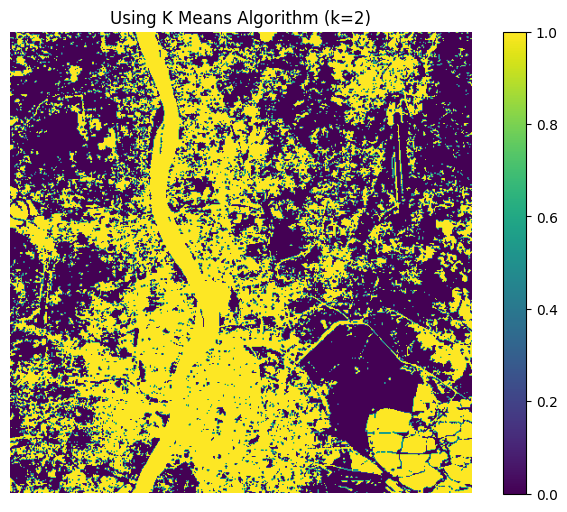

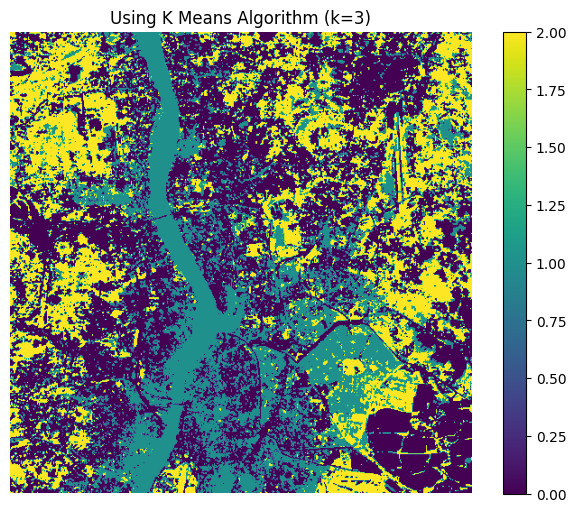

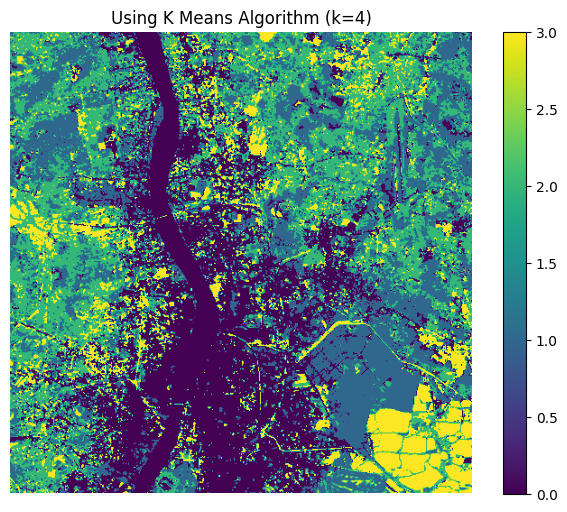

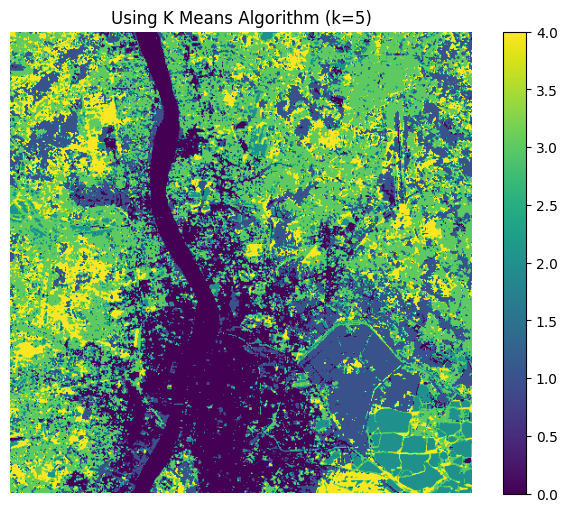

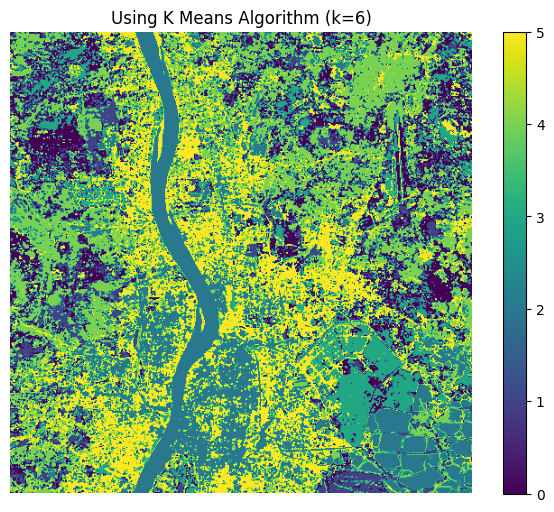

In [15]:
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    clusters, centroids = k_means(data, k)
    
    clustered_image = clusters.reshape(band1.shape)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(clustered_image.squeeze(), cmap='viridis')
    plt.title(f'Using K Means Algorithm (k={k})')
    plt.colorbar()
    plt.axis('off')
    plt.show()